In [4]:
# Step 1: Importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [5]:
# Step 2: Load the dataset
kc_house = pd.read_csv("C:\\Users\\Berkay\\PycharmProjects\\housing-price-regression\\data\\kc_house_data.csv")

In [6]:
# Step 3: Basic dataset overview
# 3.1
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# 3.2
kc_house.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
# 3.3
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# 3.4
kc_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# 3.5
kc_house.shape

(21613, 21)

In [11]:
# 3.6
kc_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
# Step 4: Feature engineering - Add sale year and zipcode-based features
kc_house['sale_year'] = pd.to_datetime(kc_house['date']).dt.year
zipcode_features = kc_house.groupby('zipcode').agg(
    mean_price=('price', 'mean'),
    total_houses=('id', 'count')
).reset_index()
kc_house = pd.merge(kc_house, zipcode_features, on='zipcode', how='left')

In [13]:
# Step 5: Drop unneeded columns
kc_house = kc_house.drop(['date', 'id'], axis=1)

In [14]:
# Step 6: Check for zero or negative values in selected features
features_to_check = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
for feature in features_to_check:
    has_zero = (kc_house[feature] == 0).any()
    has_negative = (kc_house[feature] < 0).any()
    print(f"Feature: {feature}")
    print(f"Contains zero values: {has_zero}")
    print(f"Contains negative values: {has_negative}")
    print("---")

Feature: sqft_living
Contains zero values: False
Contains negative values: False
---
Feature: sqft_lot
Contains zero values: False
Contains negative values: False
---
Feature: sqft_living15
Contains zero values: False
Contains negative values: False
---
Feature: sqft_lot15
Contains zero values: False
Contains negative values: False
---


In [15]:
# Step 7: Log transformation of selected features
features_to_log_transform = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
for feature in features_to_log_transform:
    kc_house[feature] = np.log(kc_house[feature])

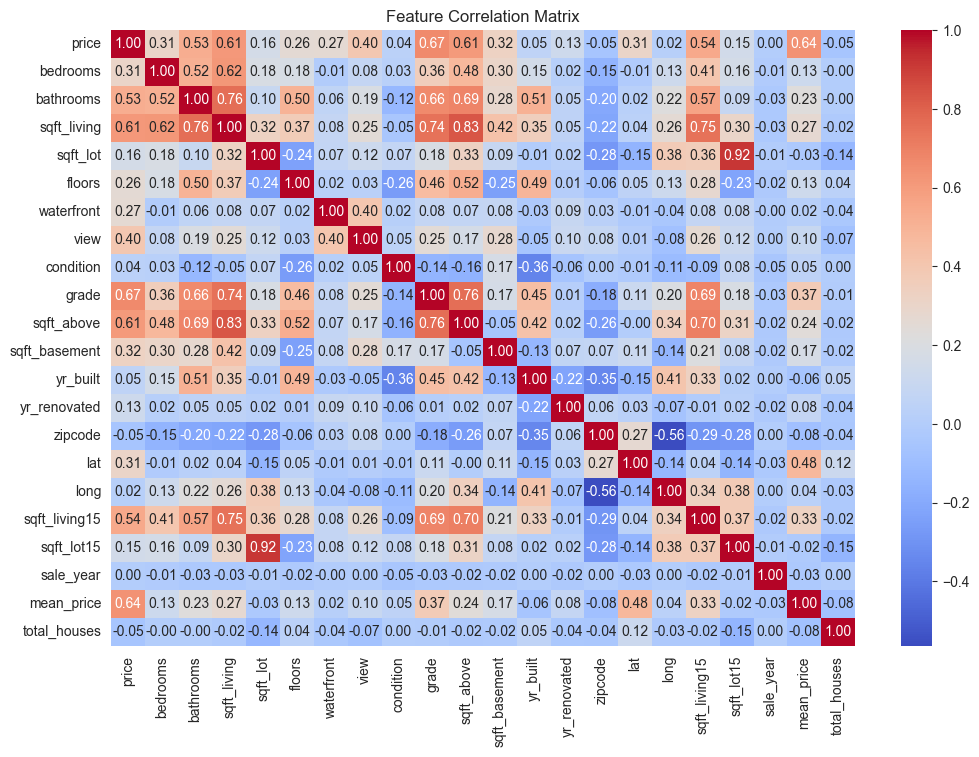

In [16]:
# Step 8: Correlation matrix visualization
correlation_matrix = kc_house.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [17]:
# Step 9: Drop the 'sqft_above' feature
kc_house = kc_house.drop('sqft_above', axis=1)

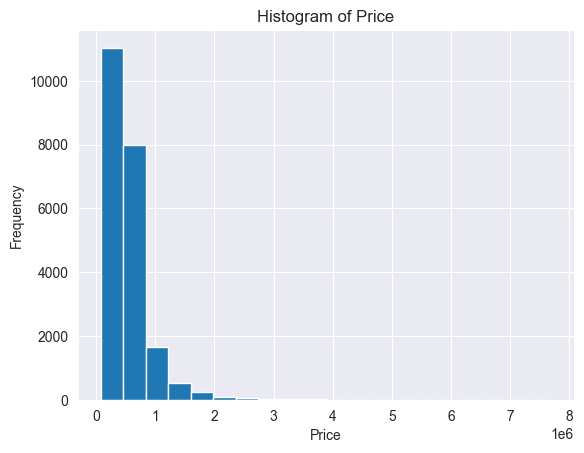

In [18]:
# Step 10: Visualize the original target variable 'price'
plt.hist(kc_house['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

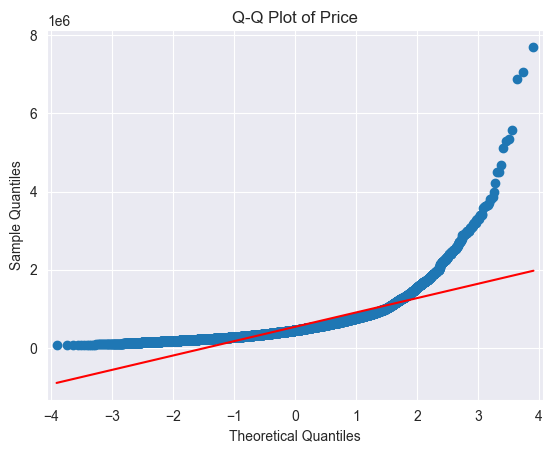

In [19]:
sm.qqplot(kc_house['price'], line='s')
plt.title('Q-Q Plot of Price')
plt.show()

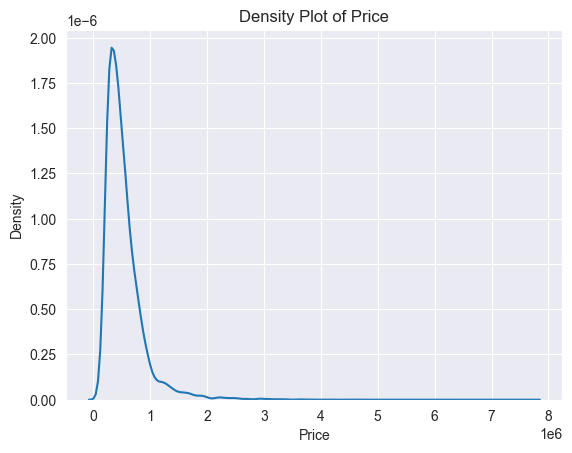

In [20]:
sns.kdeplot(kc_house['price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Price')
plt.show()

In [21]:
# Step 11: Apply Power Transformation to the target variable 'price'
target_variable = kc_house['price']
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_target = pt.fit_transform(target_variable.values.reshape(-1, 1))
kc_house['transformed_price'] = transformed_target

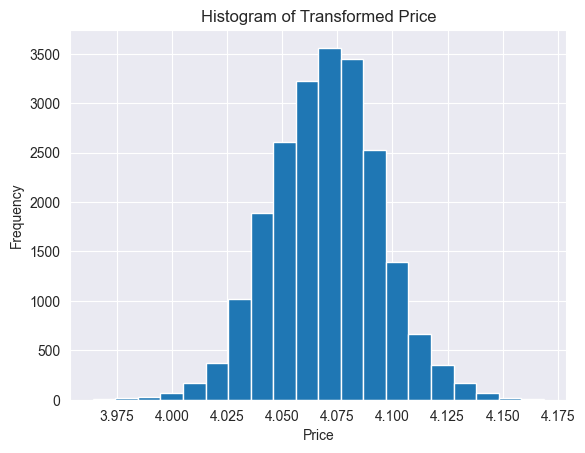

In [22]:
# Step 12: Visualize the transformed target variable
plt.hist(kc_house['transformed_price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Transformed Price')
plt.show()

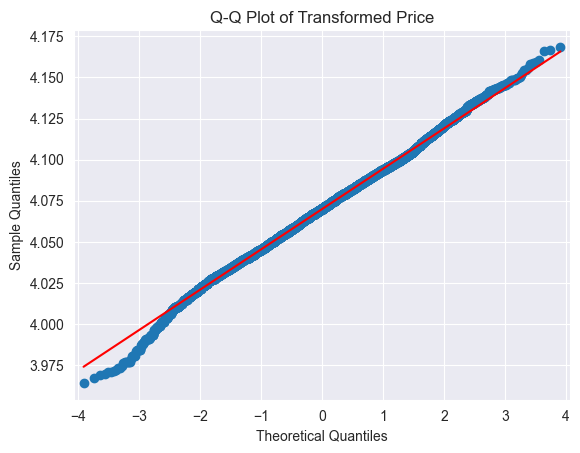

In [23]:
sm.qqplot(kc_house['transformed_price'], line='s')
plt.title('Q-Q Plot of Transformed Price')
plt.show()

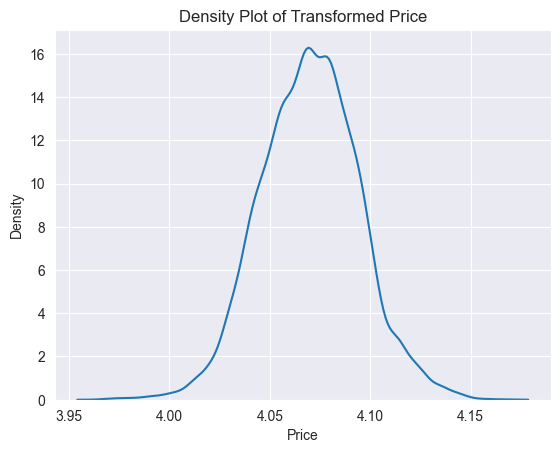

In [24]:
sns.kdeplot(kc_house['transformed_price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Transformed Price')
plt.show()

In [25]:
# Step 13: Create new features: 'age', 'years_since_renovation', and 'price_per_sqft'
kc_house['age'] = kc_house['sale_year'] - kc_house['yr_built']
kc_house['years_since_renovation'] = kc_house['sale_year'] - kc_house['yr_renovated']
kc_house['price_per_sqft'] = kc_house['transformed_price'] / kc_house['sqft_living']

In [26]:
# Step 14: Define features (X) and target (y), and split the data
X = kc_house.drop(['price', 'transformed_price'], axis=1)
y = kc_house['transformed_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 15: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Step 16: Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [29]:
# Step 17: Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} ---")
    print("R-squared:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("-" * 20)

--- Linear Regression ---
R-squared: 0.8825146887922618
MSE: 7.183974446601866e-05
MAE: 0.006213182473058972
--------------------
--- Random Forest ---
R-squared: 0.9059570924294275
MSE: 5.750521813544262e-05
MAE: 0.005332187042186512
--------------------
--- Gradient Boosting ---
R-squared: 0.8809821440503142
MSE: 7.277686265988024e-05
MAE: 0.00614069027120818
--------------------
--- XGBoost ---
R-squared: 0.9324747684302833
MSE: 4.1290228804855656e-05
MAE: 0.004590316400799488
--------------------


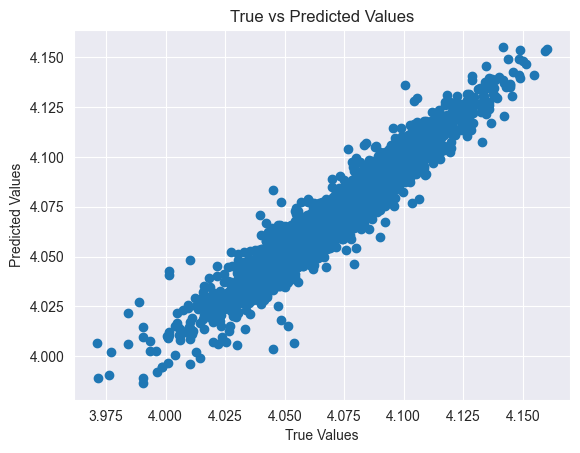

In [30]:
# Step 18: Scatter plot of true vs predicted values for the best model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()